In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

movie_data = pd.read_csv("clean_movie_data.csv")
clean_data_df = pd.DataFrame(movie_data)

In [2]:
clean_data_df

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6399,https://m.media-amazon.com/images/M/MV5BNjFjYm...,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...","16,302",A European prince terrorizes the local peasant...,109,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...
6400,https://m.media-amazon.com/images/M/MV5BMzRkNj...,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...","6,730",A former gangster fresh out of prison wants to...,20,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...
6401,https://m.media-amazon.com/images/M/MV5BNmRhZW...,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...","24,899",First mate Fletcher Christian leads a revolt a...,112,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...
6402,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...


In [3]:
temp_df = clean_data_df['Genre'].str.split(',' , expand=True)

In [4]:
temp_df.columns = ["Genre_1", "Genre_2", "Genre_3"]

In [5]:
temp_df

,Genre_1,Genre_2,Genre_3
0,Comedy,Drama,Romance
1,Action,Adventure,Sci-Fi
2,Biography,Comedy,History
3,Action,Comedy,Drama
4,Drama,Romance,Sport
...,...,...,...
6399,Drama,Horror,None
6400,Crime,Drama,None
6401,Adventure,Biography,Drama
6402,Drama,Family,Romance


In [6]:
clean_data_df = clean_data_df.join(temp_df)

In [7]:
clean_data_df.drop(columns = ["Genre"], inplace = True)

In [8]:
clean_data_df.isna().sum()

Poster               0
Title                0
Year                 0
Certificate          0
Duration (min)       0
Rating               0
Metascore            0
Director             0
Cast                 0
Votes                0
Description          0
Review Count         0
Review Title         0
Review               0
Genre_1              0
Genre_2            496
Genre_3           1979
dtype: int64

In [9]:
clean_data_df['Genre_1'].unique()

array(['Comedy', 'Action', 'Biography', 'Drama', 'Horror', 'Adventure',
       'Crime', 'Animation', 'Fantasy', 'Thriller', 'Mystery', 'Sci-Fi',
       'Documentary', 'Music', 'Film-Noir', 'Romance', 'History',
       'Family'], dtype=object)

In [10]:
genre_1_count = clean_data_df['Genre_1'].value_counts()
genre_1_count

Genre_1
Action         1651
Comedy         1476
Drama          1178
Crime           460
Biography       428
Adventure       385
Horror          359
Animation       342
Fantasy          37
Documentary      36
Mystery          26
Thriller         14
Sci-Fi            5
Romance           2
Family            2
Music             1
Film-Noir         1
History           1
Name: count, dtype: int64

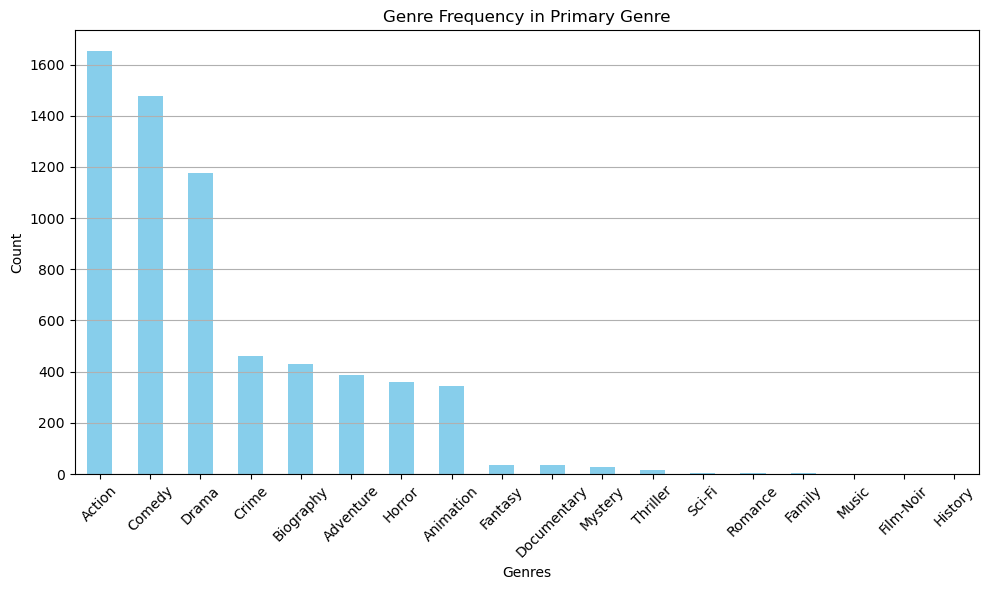

<Figure size 640x480 with 0 Axes>

In [11]:
all_genres = pd.concat([temp_df['Genre_1']])
genre_counts = all_genres.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Frequency in Primary Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('genre_1_graph.jpg', format='jpeg')

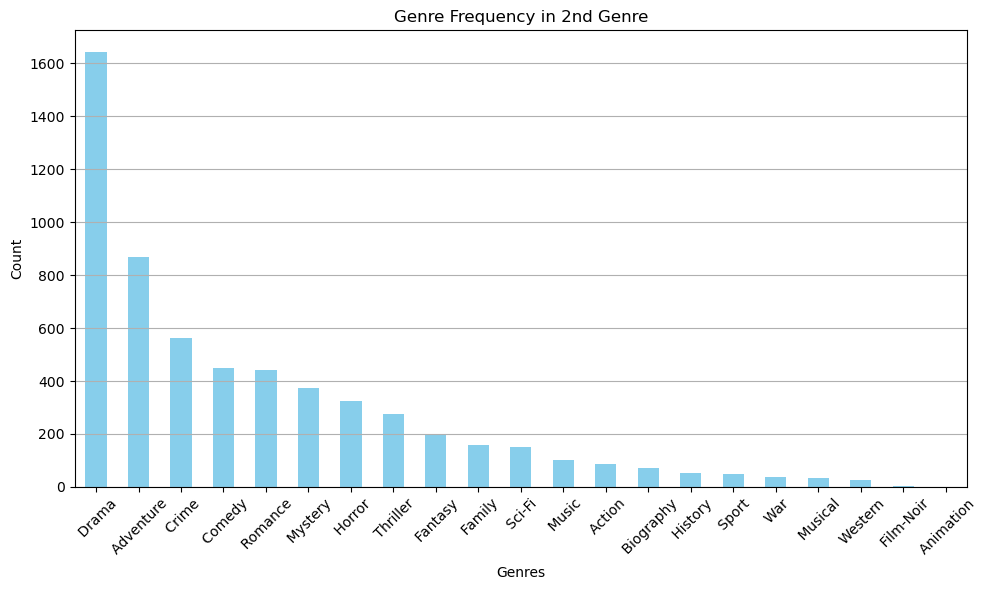

<Figure size 640x480 with 0 Axes>

In [14]:
all_2_genres = pd.concat([temp_df['Genre_2']])
genre_2_counts = all_2_genres.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_2_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Frequency in 2nd Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('genre_2_graph.jpg', format='jpeg')

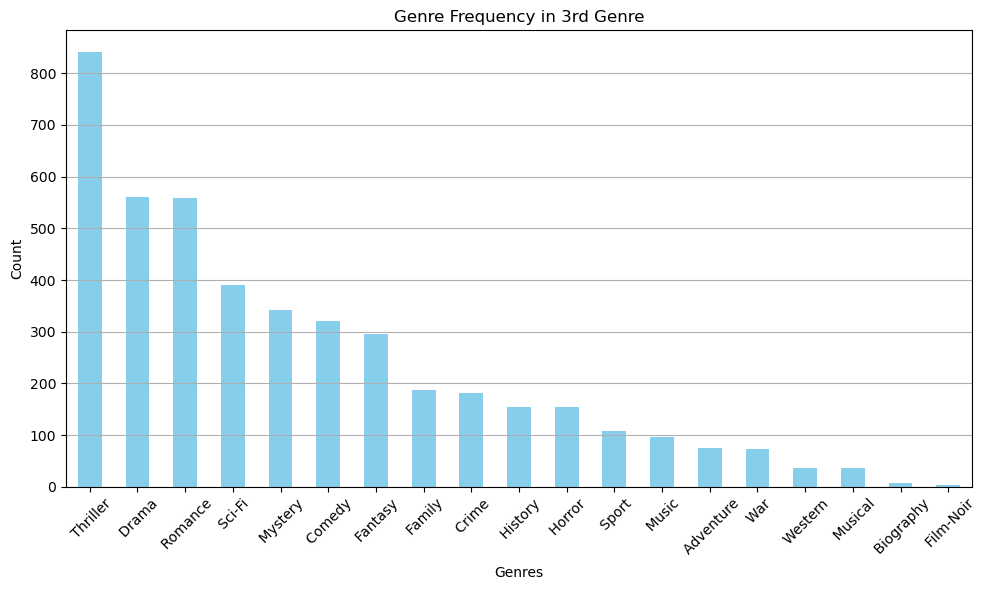

<Figure size 640x480 with 0 Axes>

In [15]:
all_3_genres = pd.concat([temp_df['Genre_3']])
genre_3_counts = all_3_genres.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_3_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Frequency in 3rd Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('genre_3_graph.jpg', format='jpeg')